## Collaboration

### Form a team

Now we're going to get to the most important question of all with Git and GitHub: working with others.

Organise into pairs. You're going to be working on the website of one of the two of you, together, so decide who is going to be the leader, and who the collaborator.

### Giving permission

The leader needs to let the collaborator have the right to make changes to his code.

In GitHub, go to `Settings` on the right, then `Collaborators & teams` on the left.

Add the user name of your collaborator to the box. They now have the right to push to your repository.

### Obtaining a colleague's code

Next, the collaborator needs to get a copy of the leader's code. For this example notebook,
I'm going to be collaborating with myself, swapping between my two repositories.
Make yourself a space to put it your work. (I will have two)

In [1]:
import os
top_dir = os.getcwd()
git_dir = os.path.join(top_dir, 'learning_git')
working_dir = os.path.join(git_dir, 'git_example')
os.chdir(git_dir)

In [2]:
%%bash
pwd
rm -rf github-example # cleanup after previous example
rm -rf partner_dir # cleanup after previous example


/Users/jroberts/GitHub/rsd-engineeringcourse/ch02git/learning_git


Next, the collaborator needs to find out the URL of the repository: they should go to the leader's repository's GitHub page, and note the URL on the top of the screen. Make sure the "ssh" button is pushed, the URL should begin with `git@github.com`. 

Copy the URL into your clipboard by clicking on the icon to the right of the URL, and then:

In [3]:
%%bash
pwd
git clone https://${GITHUB_TOKEN}@github.com/alan-turing-institute/github-example.git
mv github-example partner_dir

/Users/jroberts/GitHub/rsd-engineeringcourse/ch02git/learning_git


Cloning into 'github-example'...


In [4]:
partner_dir=os.path.join(git_dir, 'partner_dir')
os.chdir(partner_dir)

In [5]:
%%bash
pwd
ls

/Users/jroberts/GitHub/rsd-engineeringcourse/ch02git/learning_git/partner_dir
test.md
lakeland.md


Note that your partner's files are now present on your disk:

In [6]:
%%bash
cat lakeland.md

Lakeland  
  
Cumbria has some pretty hills, and lakes too

Mountains:
* Helvellyn


### Nonconflicting changes

Now, both of you should make some changes. To start with, make changes to *different* files. This will mean your work doesn't "conflict". Later, we'll see how to deal with changes to a shared file.

Both of you should commit, but not push, your changes to your respective files:

E.g., the leader:

In [7]:
os.chdir(working_dir)

In [8]:
%%writefile Wales.md
Mountains In Wales
==================

* Tryfan
* Yr Wyddfa

Writing Wales.md


In [9]:
%%bash
ls

Wales.md
__pycache__
test.md
lakeland.md
wsd.py


In [10]:
%%bash
git add Wales.md
git commit -m "Add wales"

[master c7d8ed3] Add wales
 1 file changed, 5 insertions(+)
 create mode 100644 Wales.md


And the partner:

In [11]:
os.chdir(partner_dir)

In [12]:
%%writefile Scotland.md
Mountains In Scotland
==================

* Ben Eighe
* Cairngorm

Writing Scotland.md


In [13]:
%%bash
ls

Scotland.md
test.md
lakeland.md


In [14]:
%%bash
git add Scotland.md
git commit -m "Add Scotland"

[master ef7fea2] Add Scotland
 1 file changed, 5 insertions(+)
 create mode 100644 Scotland.md


One of you should now push with `git push`:

In [15]:
%%bash
git push

To https://github.com/alan-turing-institute/github-example.git
   92ffc99..ef7fea2  master -> master


### Rejected push

The other should then push, but should receive an error message:

In [16]:
os.chdir(working_dir)

``` Python
%%bash
git push
```

``` Bash
To https://github.com/alan-turing-institute/github-example.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
```

Do as it suggests:

In [17]:
%%bash
git pull

Merge made by the 'recursive' strategy.
 Scotland.md | 5 +++++
 1 file changed, 5 insertions(+)
 create mode 100644 Scotland.md


discouraged. You can squelch this message by running one of the following
commands sometime before your next pull:

  git config pull.rebase false  # merge (the default strategy)
  git config pull.rebase true   # rebase
  git config pull.ff only       # fast-forward only

You can replace "git config" with "git config --global" to set a default
preference for all repositories. You can also pass --rebase, --no-rebase,
or --ff-only on the command line to override the configured default per
invocation.

From https://github.com/alan-turing-institute/github-example
   92ffc99..ef7fea2  master     -> origin/master
 * [new branch]      gh-pages   -> origin/gh-pages


### Merge commits

A window may pop up with a suggested default commit message. This commit is special: it is a *merge* commit. It is a commit which combines your collaborator's work with your own.

Now, push again with `git push`. This time it works. If you look on GitHub, you'll now see that it contains both sets of changes.

In [18]:
%%bash
git push

To https://github.com/alan-turing-institute/github-example.git
   ef7fea2..80f4d8a  master -> master


The partner now needs to pull down that commit:

In [19]:
os.chdir(partner_dir)

In [20]:
%%bash
git pull

Updating ef7fea2..80f4d8a
Fast-forward
 Wales.md | 5 +++++
 1 file changed, 5 insertions(+)
 create mode 100644 Wales.md


discouraged. You can squelch this message by running one of the following
commands sometime before your next pull:

  git config pull.rebase false  # merge (the default strategy)
  git config pull.rebase true   # rebase
  git config pull.ff only       # fast-forward only

You can replace "git config" with "git config --global" to set a default
preference for all repositories. You can also pass --rebase, --no-rebase,
or --ff-only on the command line to override the configured default per
invocation.

From https://github.com/alan-turing-institute/github-example
   ef7fea2..80f4d8a  master     -> origin/master


In [21]:
%%bash
ls

Scotland.md
Wales.md
test.md
lakeland.md


### Nonconflicted commits to the same file

Go through the whole process again, but this time, both of you should make changes to a single file, but make sure that you don't touch the same *line*. Again, the merge should work as before:

In [22]:
%%writefile Wales.md
Mountains In Wales
==================

* Tryfan
* Snowdon

Overwriting Wales.md


In [23]:
%%bash
git diff

diff --git a/Wales.md b/Wales.md
index f3e88b4..90f23ec 100644
--- a/Wales.md
+++ b/Wales.md
@@ -2,4 +2,4 @@ Mountains In Wales
 
 * Tryfan
-* Yr Wyddfa
+* Snowdon


In [24]:
%%bash
git commit -am "Translating from the Welsh"

[master 87a24c0] Translating from the Welsh
 1 file changed, 1 insertion(+), 1 deletion(-)


In [25]:
%%bash
git log --oneline

87a24c0 Translating from the Welsh
80f4d8a Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master
c7d8ed3 Add wales
ef7fea2 Add Scotland
92ffc99 Add Helvellyn
d0417fc Include lakes in the scope
7c1bdbf Add lakeland
b6fe910 Revert "Add a lie about a mountain"
f21aa9f Change title
d076a01 Add a lie about a mountain
8faefc9 First commit of discourse on UK topography


In [26]:
os.chdir(working_dir)

In [27]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon

Overwriting Wales.md


In [28]:
%%bash
git commit -am "Add a beacon"

[master 7031b59] Add a beacon
 1 file changed, 2 insertions(+), 1 deletion(-)


In [29]:
%%bash
git log --oneline

7031b59 Add a beacon
80f4d8a Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master
c7d8ed3 Add wales
ef7fea2 Add Scotland
92ffc99 Add Helvellyn
d0417fc Include lakes in the scope
7c1bdbf Add lakeland
b6fe910 Revert "Add a lie about a mountain"
f21aa9f Change title
d076a01 Add a lie about a mountain
8faefc9 First commit of discourse on UK topography


In [30]:
%%bash
git push

To https://github.com/alan-turing-institute/github-example.git
   80f4d8a..7031b59  master -> master


Switching back to the other partner...

In [31]:
os.chdir(partner_dir)

``` Python
%%bash
git push
```

``` Bash
To https://github.com/alan-turing-institute/github-example.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
```

In [32]:
%%bash
git pull

Auto-merging Wales.md
Merge made by the 'recursive' strategy.
 Wales.md | 1 +
 1 file changed, 1 insertion(+)


discouraged. You can squelch this message by running one of the following
commands sometime before your next pull:

  git config pull.rebase false  # merge (the default strategy)
  git config pull.rebase true   # rebase
  git config pull.ff only       # fast-forward only

You can replace "git config" with "git config --global" to set a default
preference for all repositories. You can also pass --rebase, --no-rebase,
or --ff-only on the command line to override the configured default per
invocation.

From https://github.com/alan-turing-institute/github-example
   80f4d8a..7031b59  master     -> origin/master


In [33]:
%%bash
git push

To https://github.com/alan-turing-institute/github-example.git
   7031b59..e94ee9f  master -> master


In [34]:
%%bash
git log --oneline --graph

*   e94ee9f Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master
|\  
| * 7031b59 Add a beacon
* | 87a24c0 Translating from the Welsh
|/  
*   80f4d8a Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master
|\  
| * ef7fea2 Add Scotland
* | c7d8ed3 Add wales
|/  
* 92ffc99 Add Helvellyn
* d0417fc Include lakes in the scope
* 7c1bdbf Add lakeland
* b6fe910 Revert "Add a lie about a mountain"
* f21aa9f Change title
* d076a01 Add a lie about a mountain
* 8faefc9 First commit of discourse on UK topography


In [35]:
os.chdir(working_dir)

In [36]:
%%bash
git pull

Updating 7031b59..e94ee9f
Fast-forward


discouraged. You can squelch this message by running one of the following
commands sometime before your next pull:

  git config pull.rebase false  # merge (the default strategy)
  git config pull.rebase true   # rebase
  git config pull.ff only       # fast-forward only

You can replace "git config" with "git config --global" to set a default
preference for all repositories. You can also pass --rebase, --no-rebase,
or --ff-only on the command line to override the configured default per
invocation.

From https://github.com/alan-turing-institute/github-example
   7031b59..e94ee9f  master     -> origin/master


In [37]:
%%bash
git log --graph --oneline

*   e94ee9f Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master
|\  
| * 7031b59 Add a beacon
* | 87a24c0 Translating from the Welsh
|/  
*   80f4d8a Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master
|\  
| * ef7fea2 Add Scotland
* | c7d8ed3 Add wales
|/  
* 92ffc99 Add Helvellyn
* d0417fc Include lakes in the scope
* 7c1bdbf Add lakeland
* b6fe910 Revert "Add a lie about a mountain"
* f21aa9f Change title
* d076a01 Add a lie about a mountain
* 8faefc9 First commit of discourse on UK topography


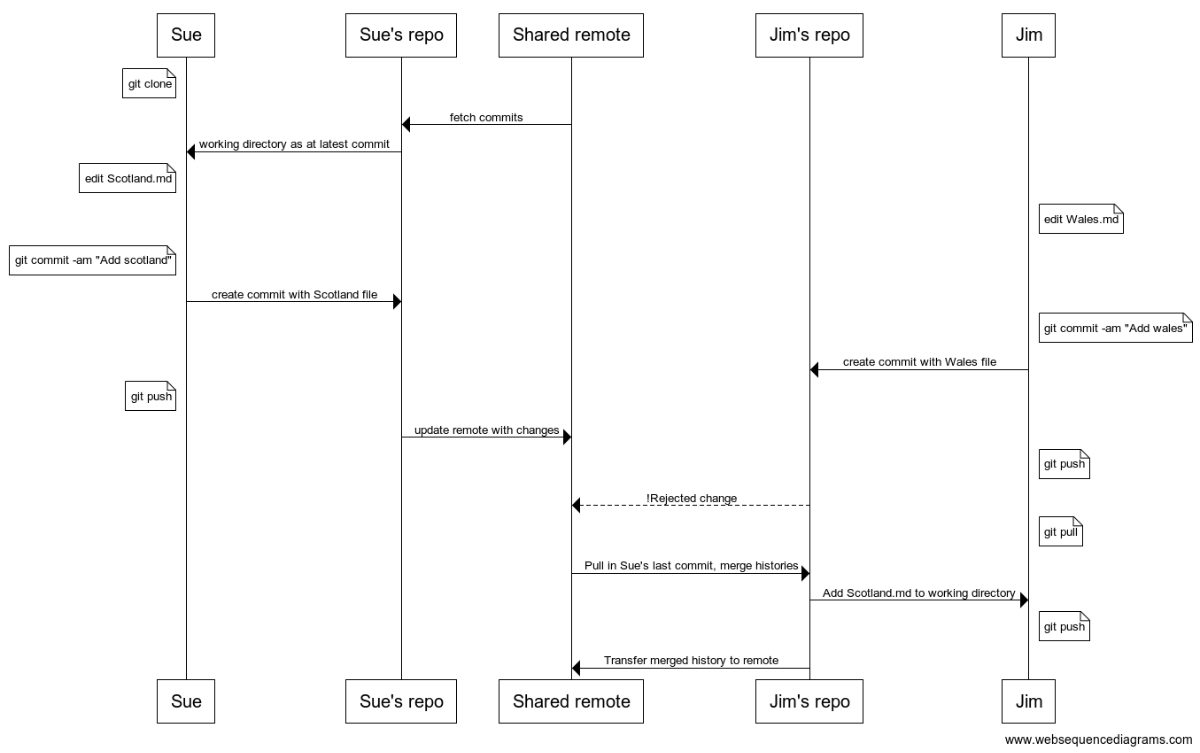

In [38]:
message="""
participant Sue as S
participant "Sue's repo" as SR
participant "Shared remote" as M
participant "Jim's repo" as JR
participant Jim as J

note left of S: git clone
M->SR: fetch commits
SR->S: working directory as at latest commit

note left of S: edit Scotland.md
note right of J: edit Wales.md

note left of S: git commit -am "Add scotland"
S->SR: create commit with Scotland file

note right of J: git commit -am "Add wales"
J->JR: create commit with Wales file

note left of S: git push
SR->M: update remote with changes

note right of J: git push
JR-->M: !Rejected change

note right of J: git pull
M->JR: Pull in Sue's last commit, merge histories
JR->J: Add Scotland.md to working directory

note right of J: git push
JR->M: Transfer merged history to remote

"""
from wsd import wsd
%matplotlib inline
wsd(message)

### Conflicting commits

Finally, go through the process again, but this time, make changes which touch the same line.

In [39]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Fan y Big

Overwriting Wales.md


In [40]:
%%bash
git commit -am "Add another Beacon"
git push

[master 7eb59fa] Add another Beacon
 1 file changed, 1 insertion(+)


To https://github.com/alan-turing-institute/github-example.git
   e94ee9f..7eb59fa  master -> master


In [41]:
os.chdir(partner_dir)

In [42]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr

Overwriting Wales.md


In [43]:
%%bash
git commit -am "Add Glyder"

[master fc771ba] Add Glyder
 1 file changed, 1 insertion(+)


``` Python
%%bash
git push
```

``` Python
To git@github.com:UCL/github-example.git
 ! [rejected]        master -> master (fetch first)
error: failed to push some refs
hint: Updates were rejected because the remote contains work that you do
hint: not have locally. This is usually caused by another repository pushing
hint: to the same ref. You may want to first integrate the remote changes
hint: (e.g., 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.
```

When you pull, instead of offering an automatic merge commit message, it says:

In [44]:
%%bash
git pull

Auto-merging Wales.md
CONFLICT (content): Merge conflict in Wales.md
Automatic merge failed; fix conflicts and then commit the result.


discouraged. You can squelch this message by running one of the following
commands sometime before your next pull:

  git config pull.rebase false  # merge (the default strategy)
  git config pull.rebase true   # rebase
  git config pull.ff only       # fast-forward only

You can replace "git config" with "git config --global" to set a default
preference for all repositories. You can also pass --rebase, --no-rebase,
or --ff-only on the command line to override the configured default per
invocation.

From https://github.com/alan-turing-institute/github-example
   e94ee9f..7eb59fa  master     -> origin/master


CalledProcessError: Command 'b'git pull\n'' returned non-zero exit status 1.

### Resolving conflicts

Git couldn't work out how to merge the two different sets of changes.

You now need to manually resolve the conflict.

It has marked the conflicted area:

In [45]:
%%bash
cat Wales.md

Mountains In Wales

* Pen y Fan
* Tryfan
* Snowdon
<<<<<<< HEAD
* Glyder Fawr
* Fan y Big
>>>>>>> 7eb59fa979aeb76a50234ae709fb22bd53dc2054


Manually edit the file, to combine the changes as seems sensible and get rid of the symbols:

In [46]:
%%writefile Wales.md
Mountains In Wales
==================

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr
* Fan y Big

Overwriting Wales.md


### Commit the resolved file

Now commit the merged result:

In [47]:
%%bash
git commit -a --no-edit # I added a No-edit for this non-interactive session. You can edit the commit if you like.

[master 07db740] Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master


In [48]:
%%bash
git push

To https://github.com/alan-turing-institute/github-example.git
   7eb59fa..07db740  master -> master


In [49]:
os.chdir(working_dir)

In [50]:
%%bash
git pull

Updating 7eb59fa..07db740
Fast-forward
 Wales.md | 1 +
 1 file changed, 1 insertion(+)


discouraged. You can squelch this message by running one of the following
commands sometime before your next pull:

  git config pull.rebase false  # merge (the default strategy)
  git config pull.rebase true   # rebase
  git config pull.ff only       # fast-forward only

You can replace "git config" with "git config --global" to set a default
preference for all repositories. You can also pass --rebase, --no-rebase,
or --ff-only on the command line to override the configured default per
invocation.

From https://github.com/alan-turing-institute/github-example
   7eb59fa..07db740  master     -> origin/master


In [51]:
%%bash
cat Wales.md

Mountains In Wales

* Pen y Fan
* Tryfan
* Snowdon
* Glyder Fawr
* Fan y Big


In [52]:
%%bash
git log --oneline --graph

*   07db740 Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master
|\  
| * 7eb59fa Add another Beacon
* | fc771ba Add Glyder
|/  
*   e94ee9f Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master
|\  
| * 7031b59 Add a beacon
* | 87a24c0 Translating from the Welsh
|/  
*   80f4d8a Merge branch 'master' of https://github.com/alan-turing-institute/github-example into master
|\  
| * ef7fea2 Add Scotland
* | c7d8ed3 Add wales
|/  
* 92ffc99 Add Helvellyn
* d0417fc Include lakes in the scope
* 7c1bdbf Add lakeland
* b6fe910 Revert "Add a lie about a mountain"
* f21aa9f Change title
* d076a01 Add a lie about a mountain
* 8faefc9 First commit of discourse on UK topography


### Distributed VCS in teams with conflicts

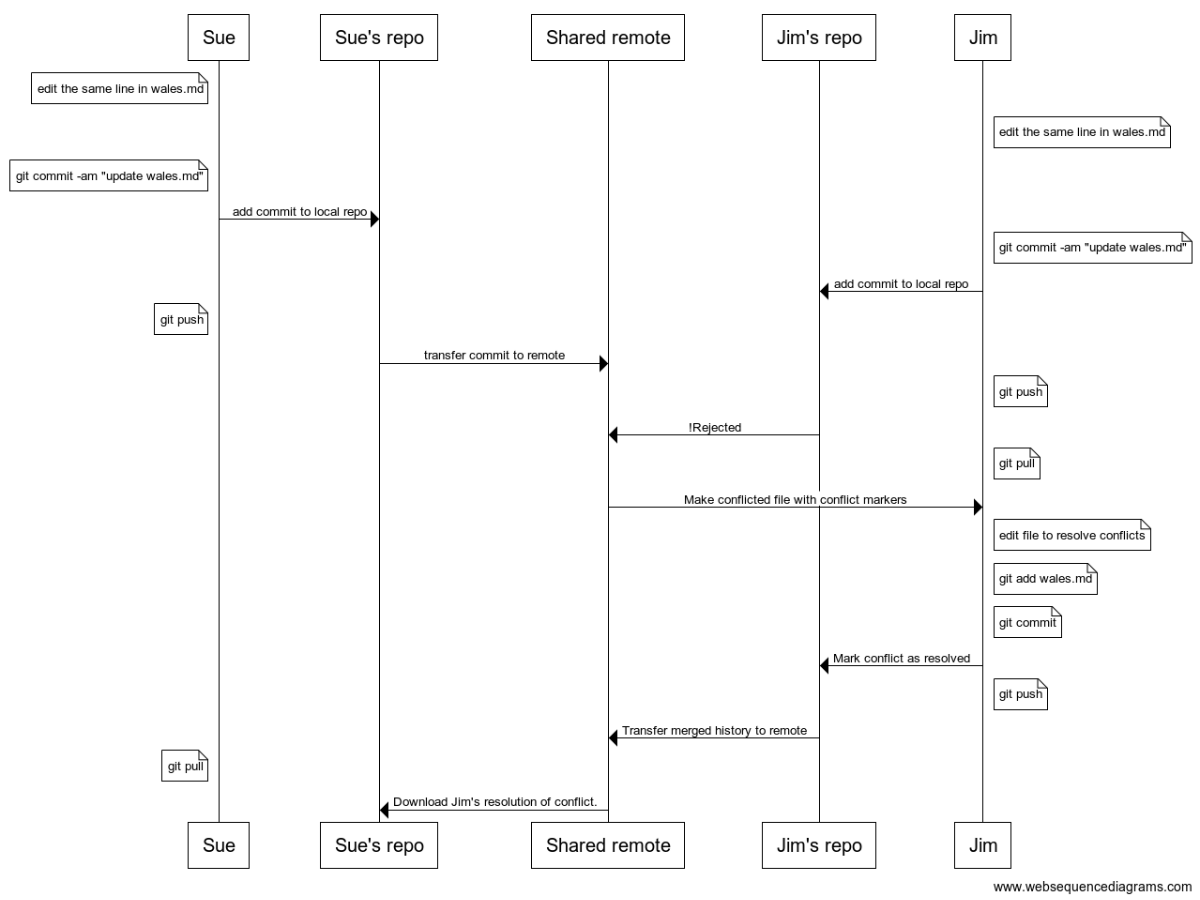

In [53]:
message="""
participant Sue as S
participant "Sue's repo" as SR
participant "Shared remote" as M
participant "Jim's repo" as JR
participant Jim as J

note left of S: edit the same line in wales.md
note right of J: edit the same line in wales.md
    
note left of S: git commit -am "update wales.md"
S->SR: add commit to local repo
    
note right of J: git commit -am "update wales.md"
J->JR: add commit to local repo
    
note left of S: git push
SR->M: transfer commit to remote
    
note right of J: git push
JR->M: !Rejected

note right of J: git pull
M->J: Make conflicted file with conflict markers
    
note right of J: edit file to resolve conflicts
note right of J: git add wales.md
note right of J: git commit
J->JR: Mark conflict as resolved

note right of J: git push
JR->M: Transfer merged history to remote

note left of S: git pull
M->SR: Download Jim's resolution of conflict.
    
"""

wsd(message)

### The Levels of Git

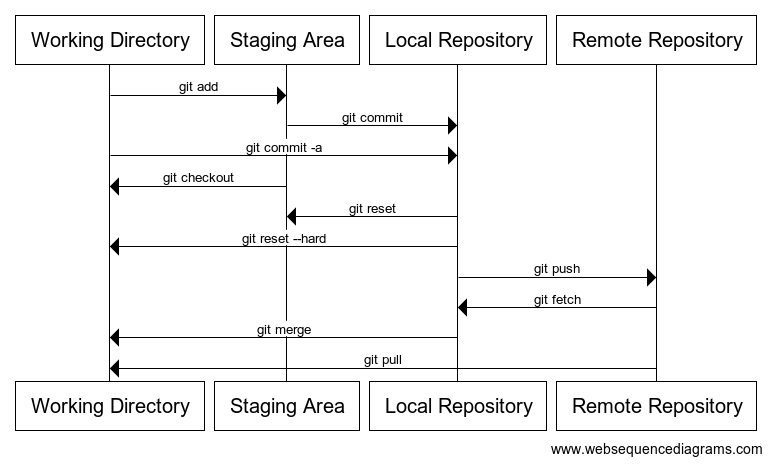

In [54]:
message="""
Working Directory -> Staging Area : git add
Staging Area -> Local Repository : git commit
Working Directory -> Local Repository : git commit -a
Local Repository -> Working Directory : git checkout
Local Repository -> Staging Area : git reset
Local Repository -> Working Directory: git reset --hard
Local Repository -> Remote Repository : git push
Remote Repository -> Local Repository : git fetch
Local Repository -> Working Directory : git merge
Remote Repository -> Working Directory: git pull
"""

wsd(message)

## Editing directly on GitHub

### Editing directly on GitHub

Note that you can also make changes in the GitHub website itself. Visit one of your files, and hit "edit".

Make a change in the edit window, and add an appropriate commit message.

That change now appears on the website, but not in your local copy. (Verify this). 

Now pull, and check the change is now present on your local version. 

## Social Coding

### GitHub as a social network

In addition to being a repository for code, and a way to publish code, GitHub is a social network.  

You can follow the public work of other coders: go to the profile of your collaborator in your browser, and hit the "follow" button. 

[Here's mine](https://github.com/jamespjh) : if you want to you can follow me.

Using GitHub to build up a good public profile of software projects you've worked on is great for your CV!